# To run the initial setup, execute the following cell. It will run the necessary Python scripts to process and persist data.


In [31]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Runs people_data.py
subprocess.run(["python", "people_data.py"], check=True)

# Runs data_ingestion.py
subprocess.run(["python", "data_ingestion.py"], check=True)

# Runs persistence.py
subprocess.run(["python", "persistence.py"], check=True)

# Loading created CSVs and converting them back to dataframes for analysis
df_merged = pd.read_csv('data_output/df_merged.csv')
df_promotions = pd.read_csv('data_output/df_promotions.csv')
df_transfers = pd.read_csv('data_output/df_transfers.csv')
df_transactions = pd.read_csv('data_output/df_transactions.csv')

# Now, lets run some analysis! Please run the following blocks of code in order so the program runs accordingly. 

# I) Analyzing Promotions and Client Responses.

### A) Which clients have what type of promotion? 
###### (Run the next cell)

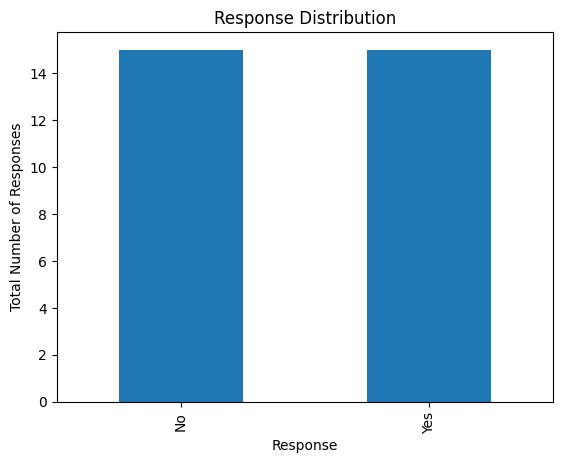

In [32]:
# Visualize the distribution of responses
df_promotions['responded'].value_counts().plot(kind='bar', title='Response Distribution')
plt.xlabel('Response')
plt.ylabel('Total Number of Responses')
plt.show()

## B) Acceptance Rates by Fruit.
### Determines the acceptance rates for each fruit offered in promotions to understand customer preferences.
###### (Run the next cell)

responded   Yes  No  acceptance_rate
promotion                           
mango         4   1         0.800000
pear          3   1         0.750000
banana        2   1         0.666667
kiwi          3   3         0.500000
orange        1   1         0.500000
apple         1   2         0.333333
watermelon    1   2         0.333333
grape         0   1         0.000000
pineapple     0   2         0.000000
strawberry    0   1         0.000000


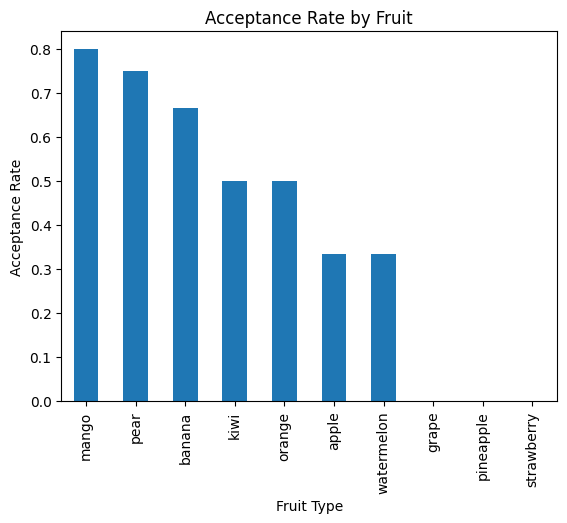

In [33]:
# Calculate the acceptance rate for each type of fruit
response_by_fruit = df_promotions.groupby(['promotion', 'responded']).size().unstack(fill_value=0)
response_by_fruit['total_responses'] = response_by_fruit.sum(axis=1)
response_by_fruit['acceptance_rate'] = response_by_fruit['Yes'] / response_by_fruit['total_responses']

# Sort the fruits by acceptance rate for better readability
response_by_fruit_sorted = response_by_fruit.sort_values(by='acceptance_rate', ascending=False)

# Display the sorted DataFrame
print(response_by_fruit_sorted[['Yes', 'No', 'acceptance_rate']])

# Visualize the acceptance rate for each fruit
response_by_fruit_sorted['acceptance_rate'].plot(kind='bar', title='Acceptance Rate by Fruit')
plt.xlabel('Fruit Type')
plt.ylabel('Acceptance Rate')
plt.show()


## c) Analysis of Response Distribution by Fruit Type.
### Investigates the distribution of responses (Yes/No) across different fruits to identify trends in customer preferences.
###### (Run the next cell)

responded   No  Yes
promotion          
mango        1    4
kiwi         3    3
pear         1    3
banana       1    2
apple        2    1
orange       1    1
watermelon   2    1
grape        1    0
pineapple    2    0
strawberry   1    0


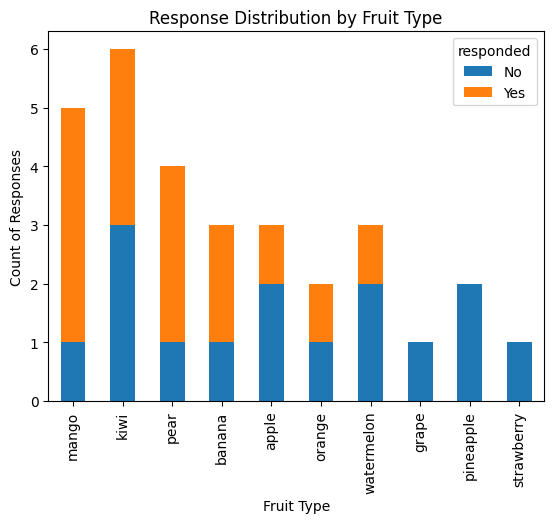

In [34]:
# Calculate the number of Yes and No responses for each fruit
response_counts = df_promotions.groupby(['promotion', 'responded']).size().unstack(fill_value=0)

# Sort the fruits by the number of Yes responses for better visibility
response_counts_sorted_yes = response_counts.sort_values(by='Yes', ascending=False)

# Display the DataFrame sorted by Yes responses
print(response_counts_sorted_yes)

# Plotting the number of responses for each fruit
response_counts_sorted_yes.plot(kind='bar', stacked=True, title='Response Distribution by Fruit Type')
plt.xlabel('Fruit Type')
plt.ylabel('Count of Responses')
plt.show()

# II) Suggestions to Improve "No" Responses
## A) Distribution of 'No' Responses by Promotion Type. 
### This analysis shows which types of promotions are most frequently declined. It can help identify if certain types of promotions are less appealing to clients.
###### (Run the next cell)

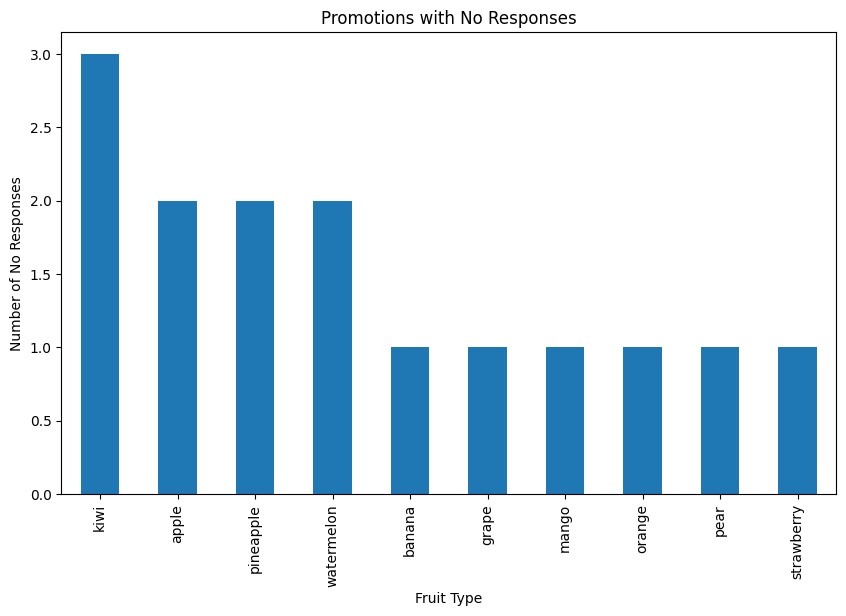

In [35]:
# Distribution of 'No' responses by promotion type
no_responses_analysis = df_promotions[df_promotions['responded'] == 'No'].groupby('promotion').size().sort_values(ascending=False)
no_responses_analysis.plot(kind='bar', title='Promotions with No Responses', figsize=(10, 6))
plt.xlabel('Fruit Type')
plt.ylabel('Number of No Responses')
plt.show()

## B. Implementing Suggestions from Analysis
### These analyses aim to provide insights that can help turn 'No' responses into 'Yes'. Based on the findings, you might consider:
#### >>> Tailoring the types of promotions more closely to client preferences.
#### >>> Refining the language used in promotion descriptions to be more appealing.
#### >>> Optimizing the timing of promotions to match when clients are more likely to be receptive.

# III) Insights on Stores and Best Selling Items
## A) Best Selling Items
###### (Run the next cell)

item
apple         7
strawberry    6
mango         5
orange        5
grape         4
Name: price, dtype: int64


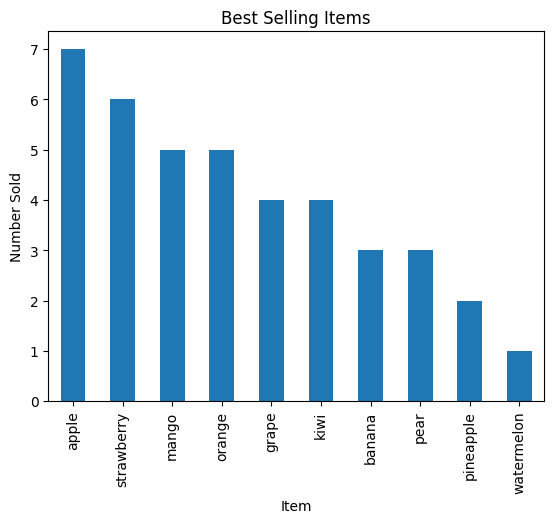

In [36]:
# What item is the best seller?
best_sellers = df_transactions.groupby('item')['price'].count().sort_values(ascending=False)
print(best_sellers.head())
best_sellers.plot(kind='bar', title='Best Selling Items')
plt.xlabel('Item')
plt.ylabel('Number Sold')
plt.show()

## B) Store Profits
###### (Run the next cell)

store
Pegasus Pet Paradise              30.00
Whimsical Willow Wares            23.25
Glimmering Gems Boutique          19.00
Frolicking Fox Furnishings        16.00
Sunrise Sensations Supermarket    15.00
Name: price, dtype: float64


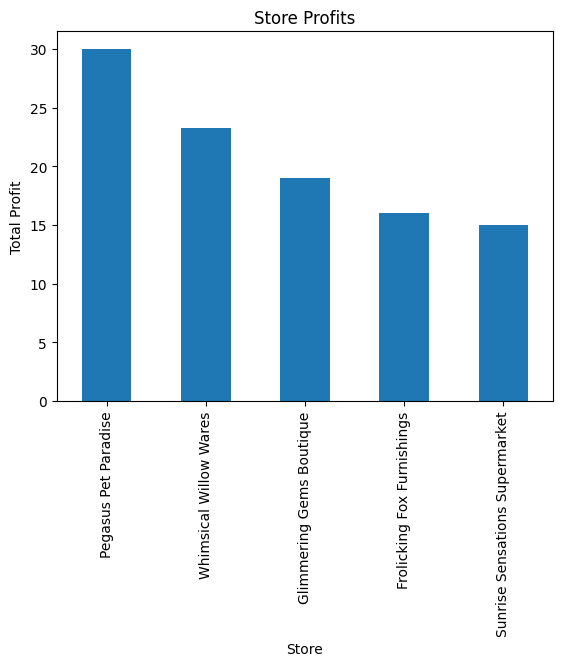

In [37]:
# Which store has had the most profit?
store_profits = df_transactions.groupby('store')['price'].sum().sort_values(ascending=False)
print(store_profits.head())
store_profits.plot(kind='bar', title='Store Profits')
plt.xlabel('Store')  
plt.ylabel('Total Profit')  
plt.show()


# IV) How can we use the data we got from the transfer file?
## A. Distribution of Transfer Amounts
### A histogram can help visualize the distribution of transfer amounts, providing insights into common transfer sizes.
###### (Run the next cell)

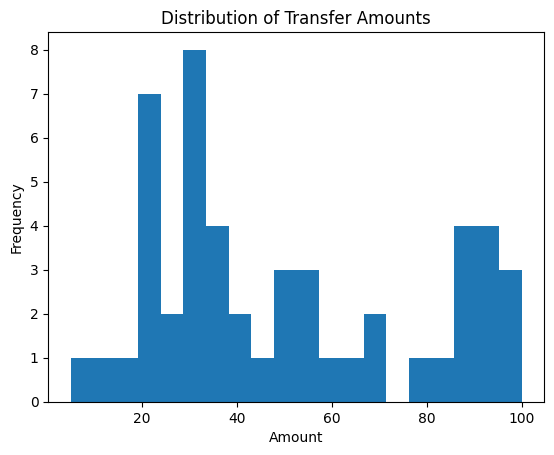

In [38]:
df_transfers['amount'].plot(kind='hist', bins=20, title='Distribution of Transfer Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## B. Top Senders by Total Amount Sent
### This visualization shows which senders have transferred the most money, indicating potentially high-value clients.
###### (Run the next cell)

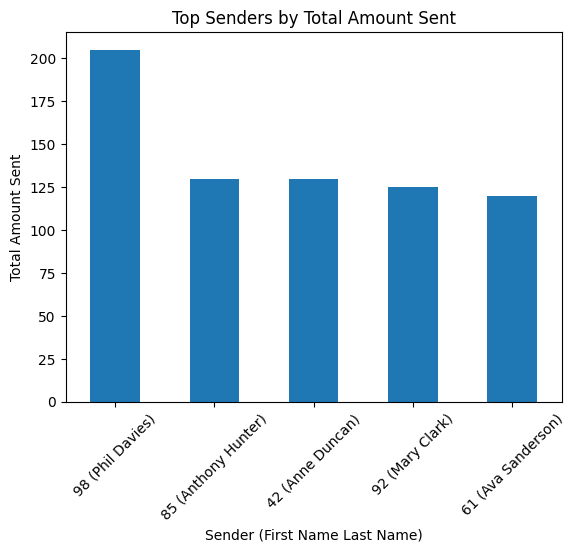

In [39]:
# Define top senders by total amount sent
top_senders = df_transfers.groupby('sender_id')['amount'].sum().sort_values(ascending=False).head(5)

# Merge to get names
top_senders_df = top_senders.reset_index().merge(df_merged[['id', 'firstName', 'lastName']], left_on='sender_id', right_on='id', how='left')

# Create a new index for plotting
top_senders_df['name_with_id'] = top_senders_df.apply(lambda x: f"{x['sender_id']} ({x['firstName']} {x['lastName']})", axis=1)

# Set the new index and plot
top_senders_df.set_index('name_with_id')['amount'].plot(kind='bar', title='Top Senders by Total Amount Sent')
plt.xlabel('Sender (First Name Last Name)')
plt.ylabel('Total Amount Sent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## C. Top Recipients by Total Amount Received
### Similarly, identifying the top recipients can indicate users or entities that are key beneficiaries of transfers.
###### (Run the next cell)

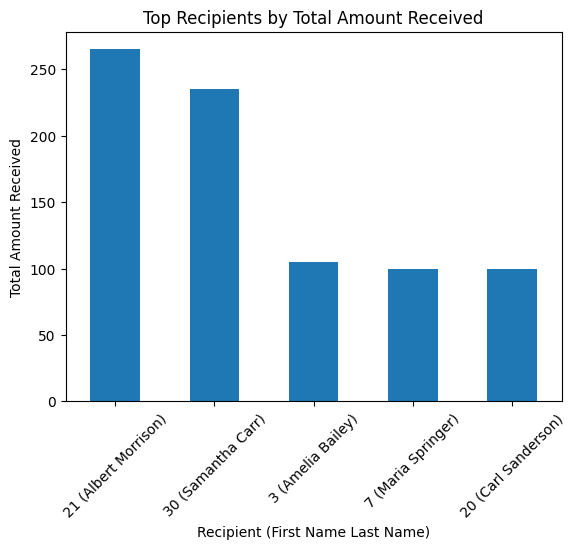

In [40]:
# Define top recipients by total amount received
top_recipients = df_transfers.groupby('recipient_id')['amount'].sum().sort_values(ascending=False).head(5)

# Merge to get names
top_recipients_df = top_recipients.reset_index().merge(df_merged[['id', 'firstName', 'lastName']], left_on='recipient_id', right_on='id', how='left')

# Create a new index for plotting
top_recipients_df['name_with_id'] = top_recipients_df.apply(lambda x: f"{x['recipient_id']} ({x['firstName']} {x['lastName']})", axis=1)

# Set the new index and plot
top_recipients_df.set_index('name_with_id')['amount'].plot(kind='bar', title='Top Recipients by Total Amount Received')
plt.xlabel('Recipient (First Name Last Name)')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()